In [1]:
import pandas as pd
import numpy as np

import os
os.chdir('E:/学习资料/python数据分析/dataquest/第六单元/指导项目1：预测汽车价格/')

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
print(cars.shape)
cars.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
#转化数据类型
#Select only the columns with continuous values 
cars.replace('?',np.nan,inplace = True)
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols].astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [4]:
#因为`price`是我们要预测的列，所以让我们删除所有缺少`price`值的行
numeric_cars = numeric_cars.dropna(subset = ['price'])
numeric_cars.isnull().sum()

#使用列均值替换其他列中的缺失值
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

#确认没有其他缺失的值！
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
# 标准化数据

price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.mean()) / ((numeric_cars.max()) - numeric_cars.min())
numeric_cars['price'] = price_col
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,13495.0
1,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,16500.0
2,0.000000,-0.125277,-0.044791,-0.033253,-0.113889,0.103698,-0.464793,0.101474,-0.072767,0.236463,-0.047995,-0.171642,-0.123331,16500.0
3,0.219895,0.029242,0.035806,0.026577,0.044444,-0.084820,-0.100508,0.068141,-0.010267,-0.006528,0.156087,-0.032753,-0.018068,13950.0
4,0.219895,0.017580,0.035806,0.043671,0.044444,0.104086,-0.100508,0.068141,-0.135267,0.054220,0.156087,-0.199420,-0.228594,17450.0


单变量模型

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(feature,target,df):
    #随机化数据
    np.random.seed(1)
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    #区分训练与测试集
    mark = int(len(rand_df) / 2)
    train = rand_df[:mark]
    test = rand_df[mark:]
    
    #构建模型
    knn = KNeighborsRegressor()
    knn.fit(train[[feature]],train[target])
    predictions = knn.predict(test[[feature]])
    mse = mean_squared_error(test[target],predictions)
    rmse = np.sqrt(mse)
    return rmse
    
    
dic = dict()
for col in numeric_cars.columns:
    if col != 'price':
        rmse = knn_train_test(col,'price',numeric_cars)
        dic[col] = rmse
        
result = pd.Series(dic)
result.sort_values()

horsepower           4010.414152
curb-weight          4401.118255
highway-mpg          4652.697833
width                4908.609914
city-mpg             4973.940485
length               5429.900973
wheel-base           5460.787788
compression-rate     6610.812153
bore                 6806.695830
normalized-losses    7304.373172
peak-rpm             7678.470979
height               7842.199226
stroke               8005.611387
dtype: float64

In [38]:
def knn_train_test(feature,target,df):
    #随机化数据
    np.random.seed(1)
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    #区分训练与测试集
    mark = int(len(rand_df) / 2)
    train = rand_df[:mark]
    test = rand_df[mark:]
    
    #对k值进行循环，并构建不同的模型
    lst = [1,3,5,7,9]
    dic = {}
    for k in lst:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train[[feature]],train[target])
        predictions = knn.predict(test[[feature]])
        mse = mean_squared_error(test[target],predictions)
        rmse = np.sqrt(mse)
        dic[k] = rmse
    return dic


result = dict()
for col in numeric_cars.columns:
    if col != 'price':
        dic = knn_train_test(col,'price',numeric_cars)
        result[col] = dic
    
result

{'bore': {1: 8602.5884845006603,
  3: 6984.2394894809158,
  5: 6806.6958300755823,
  7: 6939.1058456518022,
  9: 6915.2973750134106},
 'city-mpg': {1: 5863.1909434713079,
  3: 4672.77285307275,
  5: 4973.9404846610796,
  7: 5413.3908826775387,
  9: 5277.1766643494775},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.0636855783587,
  5: 6610.8121531591287,
  7: 6732.8012829415147,
  9: 7024.4855254634349},
 'curb-weight': {1: 5288.0195725810245,
  3: 5022.3180117572329,
  5: 4401.1182547931239,
  7: 4330.6701276238755,
  9: 4633.4258799947584},
 'height': {1: 8942.0129519959519,
  3: 8378.2338527728607,
  5: 7842.199225717336,
  7: 7709.0699416548505,
  9: 7777.1734491607085},
 'highway-mpg': {1: 6022.8667247547837,
  3: 4671.3903897894661,
  5: 4652.6978325259934,
  7: 4817.2301043607267,
  9: 5261.877043557105},
 'horsepower': {1: 4170.0548480378011,
  3: 3985.1389178696736,
  5: 4010.4141521891734,
  7: 4351.2682711815723,
  9: 4514.5046414780554},
 'length': {1: 4611.990241761

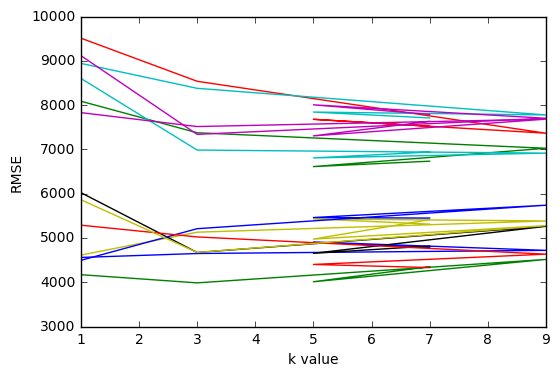

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in result.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')


多元模型

In [14]:
#Compute average RMSE across different `k` values for each feature

average_rms_sort = pd.DataFrame(result).mean().sort_values()
sorted_features = average_rms_sort.index

In [10]:
def knn_train_test(feature,target,df):
    #随机化数据
    np.random.seed(1)
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    #区分训练与测试集
    mark = int(len(rand_df) / 2)
    train = rand_df[:mark]
    test = rand_df[mark:]
    
    #构建模型
    knn = KNeighborsRegressor()
    knn.fit(train[feature],train[target])
    predictions = knn.predict(test[feature])
    mse = mean_squared_error(test[target],predictions)
    rmse = np.sqrt(mse)
    return rmse

    #对k值进行循环，并构建不同的模型
    lst = [5]
    dic = {}
    for k in lst:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train[[feature]],train[target])
        predictions = knn.predict(test[[feature]])
        mse = mean_squared_error(test[target],predictions)
        rmse = np.sqrt(mse)
        dic[k] = rmse
    return dic

best_2 = knn_train_test(average_rms_sort.index[:2].tolist(),'price',numeric_cars)
best_3 = knn_train_test(average_rms_sort.index[:3].tolist(),'price',numeric_cars)
best_4 = knn_train_test(average_rms_sort.index[:4].tolist(),'price',numeric_cars)
best_5 = knn_train_test(average_rms_sort.index[:5].tolist(),'price',numeric_cars)

print(best_2)
print(best_3)
print(best_4)
print(best_5)

3589.5762114
3305.9401398
3358.69158017
3665.54667305


超参数调整

In [43]:
def knn_train_test(feature,target,df):
    #随机化数据
    np.random.seed(1)
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    #区分训练与测试集
    mark = int(len(rand_df) / 2)
    train = rand_df[:mark]
    test = rand_df[mark:]
    
    #对k值进行循环，并构建不同的模型
    lst = list(range(1,25))
    dic = {}
    for k in lst:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train[[feature]],train[target])
        predictions = knn.predict(test[[feature]])
        mse = mean_squared_error(test[target],predictions)
        rmse = np.sqrt(mse)
        dic[k] = rmse
    return dic


result = dict()
for col in average_rms_sort.index.tolist():
    if col != 'price':
        dic = knn_train_test(col,'price',numeric_cars)
        result[col] = dic
    
result

{'bore': {1: 8602.5884845006603,
  2: 7036.080558713983,
  3: 6984.2394894809158,
  4: 6805.7673448955438,
  5: 6806.6958300755823,
  6: 6982.7923730863258,
  7: 6939.1058456518022,
  8: 6807.1834586370651,
  9: 6915.2973750134106,
  10: 6711.2070724871828,
  11: 6792.5764467814015,
  12: 7005.6433553578599,
  13: 6977.760465403152,
  14: 6871.1674156999461,
  15: 6939.8501191178175,
  16: 7095.4255205234722,
  17: 7205.3507477400535,
  18: 7222.4898060673722,
  19: 7133.1658337802792,
  20: 7092.9891149275145,
  21: 7196.4392113587173,
  22: 7308.1744763788301,
  23: 7255.1744735334905,
  24: 7208.5766876356147},
 'city-mpg': {1: 5863.1909434713079,
  2: 5020.1591477573584,
  3: 4672.77285307275,
  4: 4913.1882322172451,
  5: 4973.9404846610796,
  6: 5211.397373333114,
  7: 5413.3908826775387,
  8: 5333.749628698356,
  9: 5277.1766643494775,
  10: 5300.0701177502651,
  11: 5131.1338308393842,
  12: 5011.0485110203463,
  13: 5020.3137438459271,
  14: 5077.300352984751,
  15: 5131.30426

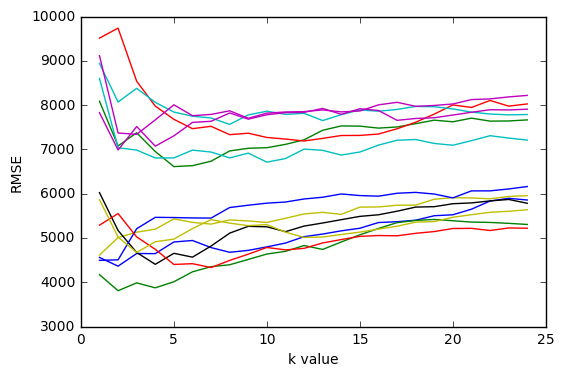

In [44]:
for k,v in result.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')